<a href="https://colab.research.google.com/github/mallamanideep/Mini-Project/blob/main/Mini_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader 

In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
!mkdir images
#Making a directory with name image 

In [ ]:
from bing_image_downloader import downloader 
downloader.download("wild cats", limit = 30 , output_dir='images ', adult_filter_off= True)

In [ ]:
from bing_image_downloader import downloader 
downloader.download("cute panda", limit = 30 , output_dir='images ', adult_filter_off= True)

In [ ]:
from bing_image_downloader import downloader
downloader.download("Red Cricket Ball", limit = 30 , output_dir='images ', adult_filter_off= True)

In [ ]:
# Preprocessing Data
#Step 1 - Resizing
#Step 2 - Flatting data

#importing libraries

import os 
import matplotlib.pyplot as plt 
import numpy as np 
from skimage.io import imread 
from skimage.transform import resize  #to resize images 

target = []
images = []
flat_data = []

DATADIR = '/content/images '
CATEGORIES = ['Red Cricket Ball','cute panda','wild cats']

for category in CATEGORIES:   #To iterate in categories
   class_num = CATEGORIES.index(category)  #Labelling categories for easy access
   path = os.path.join(DATADIR,category)   #creating a path to iterate via images
   for img in os.listdir(path):
     img_array = imread(os.path.join(path,img))  #reading images
     img_resized = resize(img_array,(150,150,3)) #resizing images
     flat_data.append(img_resized.flatten())     #flattening images
     images.append(img_resized)
     target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [ ]:
#Splitting Data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)



time: 227 ms (started: 2021-05-23 19:17:17 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              { 'C':[1,10,100,1000], 'kernel':['linear']},
              { 'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel':['rbf']},

]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 56s (started: 2021-05-23 19:17:17 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2,
       2, 2, 0, 0, 1])

time: 201 ms (started: 2021-05-23 19:19:14 +00:00)


In [ ]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 9.61 ms (started: 2021-05-23 19:19:14 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(y_pred,y_test)

#Accuracy 


0.7037037037037037

time: 8.48 ms (started: 2021-05-23 19:19:14 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[5, 0, 0],
       [0, 6, 0],
       [3, 5, 8]])

time: 10.2 ms (started: 2021-05-23 19:19:14 +00:00)


In [ ]:
import pickle
pickle.dump(clf,open('img_model.p', 'wb'))

time: 42.8 ms (started: 2021-05-23 19:19:14 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 22.1 ms (started: 2021-05-23 19:19:14 +00:00)


Enter your URLhttps://www.worldatlas.com/r/w768/upload/5d/05/9f/shutterstock-351575039.jpg
(495, 801, 3)
Predicted Output:wild cats


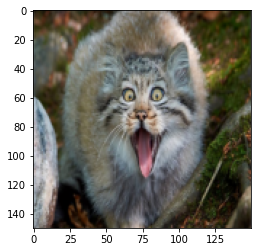

time: 22.6 s (started: 2021-05-23 19:47:45 +00:00)


In [18]:
#Testing with an image
flat_data = []
url = input("Enter your URL")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Output:{y_out}')